<a href="https://colab.research.google.com/github/rayasrujanareddy/ML-4/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QUESTION-1-Implement Decision Tree Classifier for classification of EnjoySport dataset

a. Load the data ,
b. Create a function for calculating entropy

c. Create a function for calculating InformationGain,
d. write code for creating Discission Tree

In [36]:
import pandas as pd
import numpy as n
# Load the dataset
data = pd.read_csv('/content/Enjoy sports (3).csv')

In [37]:
# Function to calculate entropy
def calculate_entropy(data, target_col):
    values, counts = np.unique(data[target_col], return_counts=True)
    entropy = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(values))])
    return entropy

In [39]:
# Function to calculate Information Gain
def calculate_info_gain(data, feature, target_col):
    total_entropy = calculate_entropy(data, target_col)
    values, counts = np.unique(data[feature], return_counts=True)

    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * calculate_entropy(data[data[feature] == values[i]], target_col) for i in range(len(values))])

    information_gain = total_entropy - weighted_entropy
    return information_gain

In [40]:
# Function to find the best feature for splitting the data
def find_best_feature(data, target_col):
    features = [col for col in data.columns if col != target_col]
    info_gains = {feature: calculate_info_gain(data, feature, target_col) for feature in features}
    best_feature = max(info_gains, key=info_gains.get)
    return best_feature

In [41]:
# Function to build the decision tree using ID3 algorithm
import numpy as np # Added import statement for numpy

def id3(data, original_data, features, target_col, parent_node=None):
    # If all target values are the same, return that value
    if len(np.unique(data[target_col])) == 1:
        return np.unique(data[target_col])[0]

    # If the dataset is empty, return the majority class of the parent node
    elif len(data) == 0:
        return np.unique(original_data[target_col])[np.argmax(np.unique(original_data[target_col], return_counts=True)[1])]

    # If there are no more features to split, return the majority class
    elif len(features) == 0:
        return parent_node
    else:
        parent_node = np.unique(data[target_col])[np.argmax(np.unique(data[target_col], return_counts=True)[1])]

        # Find the best feature to split
        best_feature = find_best_feature(data, target_col)

        # Create the tree structure
        tree = {best_feature: {}}

        # Remove the best feature from feature list
        features = [f for f in features if f != best_feature]

        # Create branches for each value of the best feature
        for value in np.unique(data[best_feature]):
            sub_data = data[data[best_feature] == value]
            subtree = id3(sub_data, original_data, features, target_col, parent_node)
            tree[best_feature][value] = subtree
        return tree

# Prepare features and target columns
target_col = 'Decision'
features = list(data.columns)
features.remove(target_col)

# Build the decision tree
decision_tree = id3(data, data, features, target_col)

# Print the resulting decision tree
import pprint
pprint.pprint(decision_tree)

{'Day': {1: 'No',
         2: 'No',
         3: 'Yes',
         4: 'Yes',
         5: 'Yes',
         6: 'No',
         7: 'Yes',
         8: 'No',
         9: 'Yes',
         10: 'Yes',
         11: 'Yes',
         12: 'Yes',
         13: 'Yes',
         14: 'No'}}


## QUESTION-2 -Implement Decision Tree Classifier for classification of EnjoySport dataset
a. Load the data set,
b. Use Label Encoding

c. create a Decision Tree,
d. Visualize the tree

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [18]:
#Load the dataset
data = pd.read_csv('/content/Enjoy sports (3).csv')
print("Dataset:")
print(data) # Changed df to data

Dataset:
    Day   Outlook Temp. Humidity    Wind Decision
0     1     Sunny   Hot     High    Weak       No
1     2     Sunny   Hot     High  Strong       No
2     3  Overcast   Hot     High    Weak      Yes
3     4      Rain  Mild     High    Weak      Yes
4     5      Rain  Cool   Normal    Weak      Yes
5     6      Rain  Cool   Normal  Strong       No
6     7  Overcast  Cool   Normal  Strong      Yes
7     8     Sunny  Mild     High    Weak       No
8     9     Sunny  Cool   Normal    Weak      Yes
9    10      Rain  Mild   Normal    Weak      Yes
10   11     Sunny  Mild   Normal  Strong      Yes
11   12  Overcast  Mild     High  Strong      Yes
12   13  Overcast   Hot   Normal    Weak      Yes
13   14      Rain  Mild     High  Strong       No


In [16]:
# Apply Label Encoding
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Features (all except 'Decision') and target (the 'Decision' column)
X = data.drop(columns=['Decision'])
y = data['Decision']

print("\nEncoded Dataset:")
print(data) # Changed df to data


Encoded Dataset:
    Day  Outlook  Temp.  Humidity  Wind  Decision
0     0        2      1         0     1         0
1     1        2      1         0     0         0
2     2        0      1         0     1         1
3     3        1      2         0     1         1
4     4        1      0         1     1         1
5     5        1      0         1     0         0
6     6        0      0         1     0         1
7     7        2      2         0     1         0
8     8        2      0         1     1         1
9     9        1      2         1     1         1
10   10        2      2         1     0         1
11   11        0      2         0     0         1
12   12        0      1         1     1         1
13   13        1      2         0     0         0


In [13]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

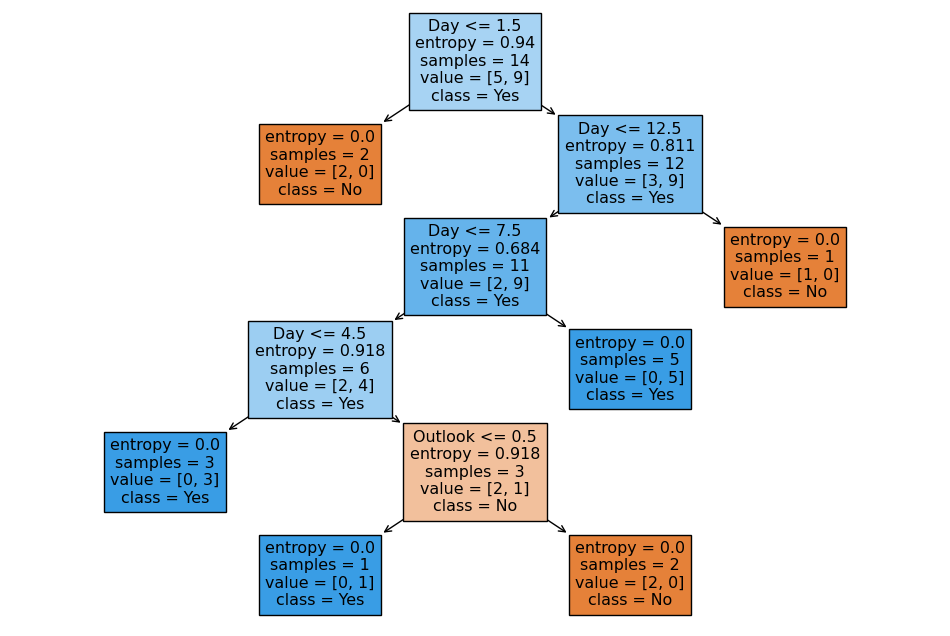

In [14]:
# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


## QUESTION-3-Implement Decision Tree Classifier for classification of Iris dataset
a. Load the data set,
b. Split the data set to train and test sets

c. Train a Decision Tree using train set,
d. Test the model using test set. Find accuracy and confusion Matrix.



In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [43]:
#Load the dataset
file_path = '/content/iris (3).csv'  # Replace this with the correct file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [44]:
#Split the dataset into train and test sets
X = data.drop(columns=['Species'])  # Features (excluding target 'Species') # Changed 'species' to 'Species'
y = data['Species']  # Target # Changed 'species' to 'Species'

# Splitting data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [35]:
# Test the model using the test set
y_pred = clf.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Decision Tree Classifier Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## QUESTION-4 -Implement Random Forest Classifier for classification of Iris dataset
a. Load the data set,
b. Split the data set to train and test sets

c. Train a Random Forest model using train set,
d. Test the model using test set. Find accuracy and confusion Matrix.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
file_path = '/content/iris (3).csv'  # Update this with the correct path if needed
data = pd.read_csv(file_path)
# Display the first few rows to verify the dataset
print(data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [50]:
#Split the dataset into train and test sets
X = data.drop(columns=['Species'])  # Features (all except 'Species') # Changed column name to 'Species'
y = data['Species']  # Target # Changed 'species' to 'Species'

# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [52]:
#Test the model on the test set
y_pred = rf_clf.predict(X_test)

#Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
